In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
from sklearn.feature_selection import f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error 
from sklearn.feature_selection import SelectKBest,f_regression, chi2

In [4]:
df = pd. read_csv ('PCA_Clusters.csv')  #import data
df

,cust_age,cust_profession,gender,hhld_size,marital_status,residence_status,state,response_flag,days_since_last_visit,months_since_first_purch,...,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,total_dollars_L6M,basket_margin,margin_hw,margin_elec,margin_haba,margin_apparel,Clusters
0,28,0,0,12,0,0,0,0,205,24,...,0,0,0,0,29.000,0.08,0.04,0.54,0.28,1
1,54,1,0,10,0,0,1,0,206,56,...,0,0,0,0,14.542,0.12,0.06,0.28,0.20,1
2,39,2,1,7,0,0,2,0,206,13,...,0,0,0,0,22.098,0.14,0.18,0.04,0.16,1
3,40,1,0,6,0,0,3,0,120,4,...,0,0,0,0,23.900,0.20,0.28,0.36,0.12,1
4,40,3,0,6,0,0,4,0,204,8,...,0,0,0,0,23.900,0.06,0.34,0.14,0.18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102534,24,0,0,1,3,0,16,0,205,14,...,1398,1681,719,4196,13.946,0.22,0.08,0.54,0.12,2
102535,56,1,0,1,0,2,16,0,208,16,...,0,466,0,753,15.086,0.04,0.04,0.16,0.10,1
102536,58,1,0,1,1,2,16,0,207,15,...,0,201,2509,2718,7.904,0.26,0.12,0.52,0.06,2
102537,36,5,0,1,3,0,16,0,213,15,...,0,600,0,869,13.200,0.04,0.12,0.40,0.24,1


# Feature Selection

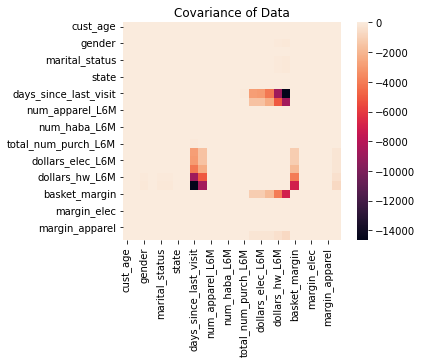

In [64]:
df_cov = df.cov()
sns.heatmap(df_cov, vmax=.8, square=True)
plt.title("Covariance of Data")
plt.show()

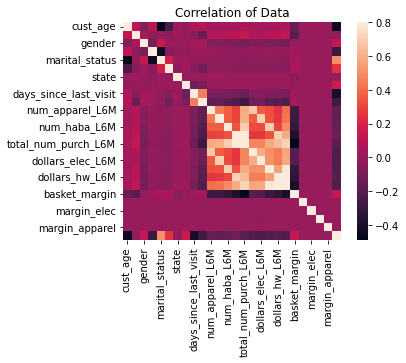

In [65]:
data_corr = df.corr()
sns.heatmap(data_corr , vmax=.8, square=True)
plt.title("Correlation of Data")
plt.show()

In [66]:
x_f = df.drop(columns=['response_flag','Clusters'])
y_f = df['response_flag']

In [67]:
len(df.columns)

26

In [68]:
#train test split
x_trainf, x_testf, y_trainf, y_testf = train_test_split(x_f, y_f, test_size=0.3, random_state=0)

In [69]:
'''using select Kbest for feature selection'''
X_clf_new=SelectKBest(score_func=chi2,k=12).fit_transform(x_f,y_f)

In [70]:
print(X_clf_new[:-5])

[[  28.  205.   24. ...    0.    0.    0.]
 [  54.  206.   56. ...    0.    0.    0.]
 [  39.  206.   13. ...    0.    0.    0.]
 ...
 [  38.  208.   17. ...    0. 4285. 4500.]
 [  58.  206.   17. ...    0.    0.    0.]
 [  24.  205.   17. ...    0.    0.    0.]]


In [71]:
print(x_f.head())

   cust_age  cust_profession  gender  hhld_size  marital_status  \
0        28                0       0         12               0   
1        54                1       0         10               0   
2        39                2       1          7               0   
3        40                1       0          6               0   
4        40                3       0          6               0   

   residence_status  state  days_since_last_visit  months_since_first_purch  \
0                 0      0                    205                        24   
1                 0      1                    206                        56   
2                 0      2                    206                        13   
3                 0      3                    120                         4   
4                 0      4                    204                         8   

   num_apparel_L6M  ...  dollars_apparel_L6M  dollars_elec_L6M  \
0                0  ...                    0            

cust_age,days_since_last_visit,months_since_first_purch,num_apparel_L6M,num_elec_L6M,num_haba_L6M,num_hw_L6M,dollars_apparel_L6M,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,total_dollars_L6M

In [22]:
x = df[['cust_age','days_since_last_visit','months_since_first_purch','num_apparel_L6M','num_elec_L6M','num_haba_L6M','num_hw_L6M','total_num_purch_L6M','dollars_apparel_L6M','dollars_elec_L6M','dollars_haba_L6M','dollars_hw_L6M','total_dollars_L6M']]
y = df['response_flag']

In [23]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [26]:
logmodel = LogisticRegression (solver = 'newton-cg') #initialize
logmodel.fit(x_train, y_train) #fit

LogisticRegression(solver='newton-cg')

In [27]:
probalities = logmodel.predict_proba(x_test)
y_pred = logmodel.predict(x_test)

In [28]:
#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[30356,     0],
       [  406,     0]])

In [29]:
rmse_test = mean_squared_error(y_test, y_pred, squared=(False)) 
print('rmse', rmse_test)

rmse 0.1148829907073504


# Logistic Regresssion w/ Feature Selection

In [5]:
x1 = df.drop(columns=['response_flag','Clusters'])
y1 = df['response_flag']

In [6]:
#train test split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.3, random_state=0)

In [7]:
logmodel1 = LogisticRegression (solver = 'newton-cg') #initialize
logmodel1.fit(x_train1, y_train1) #fit

/Users/jingu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(solver='newton-cg')

In [8]:
logmodel1.intercept_ ##b0

logmodel1.coef_ #b1

array([[-3.54034753e-03, -8.17601679e-02, -1.86818722e-01,
        -2.08513116e-02,  8.59171269e-03,  2.87667431e-01,
        -5.83888646e-03, -8.00411556e-03, -4.73190300e-02,
        -5.63486886e-02, -4.76979589e-02, -4.99063469e-02,
        -3.35918928e-02,  4.43030119e-02,  9.42026357e-05,
        -5.52150885e-05,  9.37204895e-05,  8.25011551e-06,
        -8.68233365e-05, -2.19823042e-02,  2.55155137e-01,
         1.12665456e-01, -1.82024283e-01,  1.18594586e-01]])

In [9]:
probalities1 = logmodel1.predict_proba(x_test1)
y_pred1 = logmodel1.predict(x_test1)

In [10]:
#Confusion Matrix
confusion_matrix1 = confusion_matrix(y_test1, y_pred1)
confusion_matrix1

array([[30356,     0],
       [  406,     0]])

Text(0.5, 15.0, 'Predicted label')

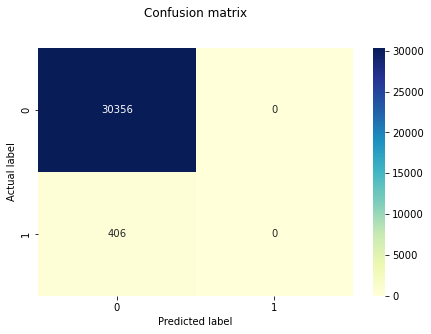

In [12]:
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [14]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     30356
           1       0.00      0.00      0.00       406

    accuracy                           0.99     30762
   macro avg       0.49      0.50      0.50     30762
weighted avg       0.97      0.99      0.98     30762



/Users/jingu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jingu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jingu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
logaccuracy = accuracy_score(y_test1, y_pred1)
logaccuracy

0.9868018984461349

In [74]:
feature_importance = dict(zip(x1.columns, abs(logmodel1.coef_[0])))
feature_importance

{'cust_age': 0.0035403475281622723,
 'cust_profession': 0.08176016791356527,
 'gender': 0.186818721939372,
 'hhld_size': 0.02085131159264055,
 'marital_status': 0.008591712691018263,
 'residence_status': 0.2876674314907503,
 'state': 0.005838886459602872,
 'days_since_last_visit': 0.008004115562840461,
 'months_since_first_purch': 0.047319029961858994,
 'num_apparel_L6M': 0.05634868864556004,
 'num_elec_L6M': 0.047697958924276,
 'num_haba_L6M': 0.049906346924087526,
 'num_hw_L6M': 0.03359189280329918,
 'total_num_purch_L6M': 0.04430301188984769,
 'dollars_apparel_L6M': 9.420263569319443e-05,
 'dollars_elec_L6M': 5.521508846380333e-05,
 'dollars_haba_L6M': 9.372048950559723e-05,
 'dollars_hw_L6M': 8.250115505037329e-06,
 'total_dollars_L6M': 8.682333646525517e-05,
 'basket_margin': 0.021982304197575388,
 'margin_hw': 0.25515513651417693,
 'margin_elec': 0.11266545621990294,
 'margin_haba': 0.1820242830666247,
 'margin_apparel': 0.11859458607567358}

In [76]:
sorted_feature_importance = {k: v for k, v in sorted(feature_importance.items(), key=lambda item: item[1], reverse=True)}
sorted_feature_importance

{'residence_status': 0.2876674314907503,
 'margin_hw': 0.25515513651417693,
 'gender': 0.186818721939372,
 'margin_haba': 0.1820242830666247,
 'margin_apparel': 0.11859458607567358,
 'margin_elec': 0.11266545621990294,
 'cust_profession': 0.08176016791356527,
 'num_apparel_L6M': 0.05634868864556004,
 'num_haba_L6M': 0.049906346924087526,
 'num_elec_L6M': 0.047697958924276,
 'months_since_first_purch': 0.047319029961858994,
 'total_num_purch_L6M': 0.04430301188984769,
 'num_hw_L6M': 0.03359189280329918,
 'basket_margin': 0.021982304197575388,
 'hhld_size': 0.02085131159264055,
 'marital_status': 0.008591712691018263,
 'days_since_last_visit': 0.008004115562840461,
 'state': 0.005838886459602872,
 'cust_age': 0.0035403475281622723,
 'dollars_apparel_L6M': 9.420263569319443e-05,
 'dollars_haba_L6M': 9.372048950559723e-05,
 'total_dollars_L6M': 8.682333646525517e-05,
 'dollars_elec_L6M': 5.521508846380333e-05,
 'dollars_hw_L6M': 8.250115505037329e-06}

#### Logistic Regression Conclusion

The confusion matrix you provided indicates that the logistic regression model is not doing a good job of predicting response to promotion based on other variables in the dataset. The matrix shows:

30,356 True Negatives (TN): The model correctly predicted that these customers would not respond to the promotion.
0 False Positives (FP): The model predicted that these customers would respond to the promotion, but they did not.
406 False Negatives (FN): The model predicted that these customers would not respond to the promotion, but they did.
0 True Positives (TP): The model correctly predicted that these customers would respond to the promotion.
The model seems to be biased towards predicting that customers will not respond to the promotion, as it has not identified any True Positives or False Positives. This indicates that the model is not capturing the nuances in the data that lead to a positive response. There could be several reasons for this, such as the model being too simplistic, the features not being informative enough, or class imbalance in the dataset.

To improve the model, you can consider the following approaches:

Feature Engineering: Create new features or transform existing ones to better capture the relationships in the data.
Feature Selection: Identify and select the most important features to improve the model's performance.
Try different models: Experiment with other machine learning models such as decision trees, random forests, or gradient boosting machines.
Handle class imbalance: If there is a significant class imbalance in the dataset, you can try using techniques such as oversampling the minority class, undersampling the majority class, or using Synthetic Minority Over-sampling Technique (SMOTE).
Cross-validation: Use cross-validation to better estimate the model's performance on unseen data and prevent overfitting.
To better interpret the findings of the logistic regression, you should look at the coefficients of the model, which can help you understand the relationship between the predictor variables and the response variable. However, given the poor performance of the model, it might not provide meaningful insights at this point. Focus on improving the model before analyzing the findings from the logistic regression.

# Feature Engineering/RFE

### Had tried feature engineering but wwasn't able to fully imlement it into final model

In [5]:
# Interaction features
df['avg_spending_apparel'] = df['dollars_apparel_L6M'] / df['num_apparel_L6M']
df['avg_spending_elec'] = df['dollars_elec_L6M'] / df['num_elec_L6M']
df['avg_spending_haba'] = df['dollars_haba_L6M'] / df['num_haba_L6M']
df['avg_spending_hw'] = df['dollars_hw_L6M'] / df['num_hw_L6M']
df['avg_total_spending'] = df['total_dollars_L6M'] / df['total_num_purch_L6M']

In [6]:
# Ratio features
df['proportion_spending_apparel'] = df['dollars_apparel_L6M'] / df['total_dollars_L6M']
df['proportion_spending_elec'] = df['dollars_elec_L6M'] / df['total_dollars_L6M']
df['proportion_spending_haba'] = df['dollars_haba_L6M'] / df['total_dollars_L6M']
df['proportion_spending_hw'] = df['dollars_hw_L6M'] / df['total_dollars_L6M']

In [7]:
# Aggregate features
df['total_num_purch_categories_L6M'] = df[['num_apparel_L6M', 'num_elec_L6M', 'num_haba_L6M', 'num_hw_L6M']].gt(0).sum(axis=1)
df['total_margin_L6M'] = df['total_dollars_L6M'] * df['basket_margin']


In [8]:
df

,cust_age,cust_profession,gender,hhld_size,marital_status,residence_status,state,response_flag,days_since_last_visit,months_since_first_purch,...,avg_spending_elec,avg_spending_haba,avg_spending_hw,avg_total_spending,proportion_spending_apparel,proportion_spending_elec,proportion_spending_haba,proportion_spending_hw,total_num_purch_categories_L6M,total_margin_L6M
0,28,0,0,12,0,0,0,0,205,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000
1,54,1,0,10,0,0,1,0,206,56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000
2,39,2,1,7,0,0,2,0,206,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000
3,40,1,0,6,0,0,3,0,120,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000
4,40,3,0,6,0,0,4,0,204,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102534,24,0,0,1,3,0,16,0,205,14,...,699.0,560.333333,719.000000,599.428571,0.094852,0.333174,0.400620,0.171354,4,58517.416
102535,56,1,0,1,0,2,16,0,208,16,...,NaN,466.000000,NaN,753.000000,0.000000,0.000000,0.618858,0.000000,1,11359.758
102536,58,1,0,1,1,2,16,0,207,15,...,NaN,201.000000,167.266667,169.875000,0.000000,0.000000,0.073951,0.923105,2,21483.072
102537,36,5,0,1,3,0,16,0,213,15,...,NaN,150.000000,NaN,173.800000,0.154200,0.000000,0.690449,0.000000,2,11470.800


In [9]:
df = df.replace(np.nan, 0)
df

,cust_age,cust_profession,gender,hhld_size,marital_status,residence_status,state,response_flag,days_since_last_visit,months_since_first_purch,...,avg_spending_elec,avg_spending_haba,avg_spending_hw,avg_total_spending,proportion_spending_apparel,proportion_spending_elec,proportion_spending_haba,proportion_spending_hw,total_num_purch_categories_L6M,total_margin_L6M
0,28,0,0,12,0,0,0,0,205,24,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000
1,54,1,0,10,0,0,1,0,206,56,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000
2,39,2,1,7,0,0,2,0,206,13,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000
3,40,1,0,6,0,0,3,0,120,4,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000
4,40,3,0,6,0,0,4,0,204,8,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102534,24,0,0,1,3,0,16,0,205,14,...,699.0,560.333333,719.000000,599.428571,0.094852,0.333174,0.400620,0.171354,4,58517.416
102535,56,1,0,1,0,2,16,0,208,16,...,0.0,466.000000,0.000000,753.000000,0.000000,0.000000,0.618858,0.000000,1,11359.758
102536,58,1,0,1,1,2,16,0,207,15,...,0.0,201.000000,167.266667,169.875000,0.000000,0.000000,0.073951,0.923105,2,21483.072
102537,36,5,0,1,3,0,16,0,213,15,...,0.0,150.000000,0.000000,173.800000,0.154200,0.000000,0.690449,0.000000,2,11470.800


In [10]:
from sklearn.feature_selection import RFE

In [11]:
# Prepare the dataset
X = df.drop(columns=['response_flag','Clusters'])  # Drop the target variable from the feature set
y = df['response_flag']


In [12]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [14]:
# Create the logistic regression model
logreg = LogisticRegression(solver='newton-cg')


In [15]:
# Perform RFE
n_features_to_select = 12  # Specify the number of top features you want to select
rfe = RFE(estimator=logreg, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(solver='newton-cg'), n_features_to_select=12)

In [16]:
# Print the most important features
selected_features = pd.Series(rfe.support_, index=X.columns)
print("Selected features (top {}):".format(n_features_to_select))
print(selected_features[selected_features].index)

Selected features (top 12):
Index(['residence_status', 'days_since_last_visit', 'months_since_first_purch',
       'num_haba_L6M', 'num_hw_L6M', 'dollars_hw_L6M', 'total_dollars_L6M',
       'avg_total_spending', 'proportion_spending_haba',
       'proportion_spending_hw', 'total_num_purch_categories_L6M',
       'total_margin_L6M'],
      dtype='object')


In [17]:
# You can now train your logistic regression model using only the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)
logreg.fit(X_train_selected, y_train)

LogisticRegression(solver='newton-cg')

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [19]:
# Make predictions using the test set
y_pred = logreg.predict(X_test_selected)
y_pred_proba = logreg.predict_proba(X_test_selected)[:, 1]


In [20]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


/Users/jingu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Accuracy: 0.9878746505428776
Precision: 0.0
Recall: 0.0
F1 score: 0.0


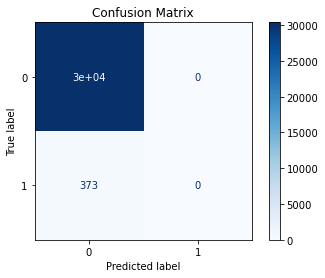

In [23]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
cm_display.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [24]:
print(cm)

[[30389     0]
 [  373     0]]


This indicates that the model predicts all instances as the negative class (non-responders). The model did not predict any positive instances (responders) correctly. It may be due to the imbalance in the dataset, where the majority of instances belong to the negative class.

In this case, the model is not a good predictor of response to promotions based on the variables in the dataset. Relying solely on accuracy as an evaluation metric is not appropriate when dealing with imbalanced datasets. Instead, you should consider other metrics like precision, recall, F1-score, and AUC-ROC to evaluate the model's performance.

You can try different approaches to improve the model's performance:

Resampling: You can either oversample the minority class, undersample the majority class, or use a combination of both to balance the class distribution.

Using different classifiers: Experiment with other classifiers like Random Forest, Gradient Boosting Machines, or Support Vector Machines, which might perform better on imbalanced datasets.

Tuning hyperparameters: You can fine-tune the hyperparameters of your classifier using techniques like GridSearchCV or RandomizedSearchCV to improve the model's performance.

Using different evaluation metrics: As mentioned earlier, use other evaluation metrics like precision, recall, F1-score, and AUC-ROC to assess the model's performance.

Remember that even after applying feature engineering and RFE, the model's performance may not improve significantly if the dataset's imbalance is severe. You should focus on addressing the class imbalance issue and fine-tuning the classifier to improve its performance.

# Random Forest

In [19]:
x = df.drop(columns=['response_flag','Clusters'])
y = df['response_flag']

In [20]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [21]:
# Create the random forest classifier
rf = RandomForestClassifier(random_state=0)

In [22]:
# Train the random forest model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [23]:
# Make predictions using the test set
y_pred = rf.predict(X_test)

In [24]:
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     30356
           1       1.00      0.00      0.00       406

    accuracy                           0.99     30762
   macro avg       0.99      0.50      0.50     30762
weighted avg       0.99      0.99      0.98     30762



In [25]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[30356     0]
 [  405     1]]


In [26]:
# Tune hyperparameters using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [27]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=1)

In [28]:
# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [29]:
# Train the random forest model with the best hyperparameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200,
                       random_state=0)

In [30]:
# Make predictions using the test set with the best hyperparameters
y_pred_best = best_rf.predict(X_test)

In [31]:
# Print classification report and confusion matrix for the best model
print("Classification Report (Best Model):")
print(classification_report(y_test, y_pred_best))

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     30356
           1       0.00      0.00      0.00       406

    accuracy                           0.99     30762
   macro avg       0.49      0.50      0.50     30762
weighted avg       0.97      0.99      0.98     30762



/Users/jingu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jingu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jingu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
print("Confusion Matrix (Best Model):")
print(confusion_matrix(y_test, y_pred_best))
rf_confusion_matrix = confusion_matrix(y_test, y_pred_best)

Confusion Matrix (Best Model):
[[30356     0]
 [  406     0]]


Text(0.5, 15.0, 'Predicted label')

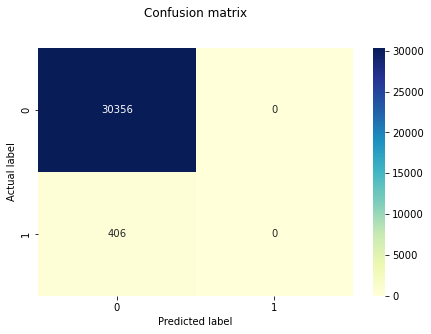

In [50]:
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
randomaccuracy = accuracy_score(y_test, y_pred_best)
randomaccuracy

0.9868018984461349

In [78]:
feature_importancerf = dict(zip(x.columns, best_rf.feature_importances_))
feature_importancerf

{'cust_age': 0.06896663834627173,
 'cust_profession': 0.02253377440248401,
 'gender': 0.008415142171356011,
 'hhld_size': 0.013865873998529716,
 'marital_status': 0.01663891631571836,
 'residence_status': 0.020449479118544476,
 'state': 0.05805450513915102,
 'days_since_last_visit': 0.08680650069733742,
 'months_since_first_purch': 0.13163099499535932,
 'num_apparel_L6M': 0.014268196074077866,
 'num_elec_L6M': 0.016361320024913698,
 'num_haba_L6M': 0.020121245088446406,
 'num_hw_L6M': 0.025815028418539415,
 'total_num_purch_L6M': 0.030352554904501394,
 'dollars_apparel_L6M': 0.0291681905997917,
 'dollars_elec_L6M': 0.026842679096868424,
 'dollars_haba_L6M': 0.03240723940381251,
 'dollars_hw_L6M': 0.04022334317756368,
 'total_dollars_L6M': 0.04429588878887171,
 'basket_margin': 0.07525812738517805,
 'margin_hw': 0.048071814491098326,
 'margin_elec': 0.04831860664855098,
 'margin_haba': 0.06063408203916267,
 'margin_apparel': 0.06049985867387111}

In [79]:
sorted_feature_importancerf = {k: v for k, v in sorted(feature_importancerf.items(), key=lambda item: item[1], reverse=True)}
sorted_feature_importancerf

{'months_since_first_purch': 0.13163099499535932,
 'days_since_last_visit': 0.08680650069733742,
 'basket_margin': 0.07525812738517805,
 'cust_age': 0.06896663834627173,
 'margin_haba': 0.06063408203916267,
 'margin_apparel': 0.06049985867387111,
 'state': 0.05805450513915102,
 'margin_elec': 0.04831860664855098,
 'margin_hw': 0.048071814491098326,
 'total_dollars_L6M': 0.04429588878887171,
 'dollars_hw_L6M': 0.04022334317756368,
 'dollars_haba_L6M': 0.03240723940381251,
 'total_num_purch_L6M': 0.030352554904501394,
 'dollars_apparel_L6M': 0.0291681905997917,
 'dollars_elec_L6M': 0.026842679096868424,
 'num_hw_L6M': 0.025815028418539415,
 'cust_profession': 0.02253377440248401,
 'residence_status': 0.020449479118544476,
 'num_haba_L6M': 0.020121245088446406,
 'marital_status': 0.01663891631571836,
 'num_elec_L6M': 0.016361320024913698,
 'num_apparel_L6M': 0.014268196074077866,
 'hhld_size': 0.013865873998529716,
 'gender': 0.008415142171356011}

Similar to the logistic regression model, this model also predicts all instances as the negative class (non-responders) and does not predict any positive instances (responders) correctly. The model's performance has not improved, and it is still not a good predictor of response to promotions based on the variables in the dataset.

The issue is likely due to the class imbalance in the dataset, where the majority of instances belong to the negative class. To improve the model's performance, consider the following approaches:

Resampling: You can either oversample the minority class, undersample the majority class, or use a combination of both to balance the class distribution. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be useful in this case.

Using different classifiers: Experiment with other classifiers like Gradient Boosting Machines or Support Vector Machines, which might perform better on imbalanced datasets.

Using different evaluation metrics: As mentioned earlier, use other evaluation metrics like precision, recall, F1-score, and AUC-ROC to assess the model's performance.

Remember that addressing the class imbalance issue should be the primary focus, as it is the main factor affecting the model's performance in this case.

# Resampling

In [36]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

In [37]:
# Prepare the dataset
X = df.drop(columns=['response_flag','Clusters'])  # Drop the target variable from the feature set
y = df['response_flag']

In [38]:
# Perform oversampling using SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X, y)


In [39]:
# Perform undersampling using RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(X, y)

In [40]:
# Perform a combination of oversampling and undersampling using SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_combined, y_combined = smoteenn.fit_resample(X, y)

In [41]:
# Now, you can split the resampled data into training and testing sets and train your models
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state=42)
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled, y_undersampled, test_size=0.3, random_state=42)
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)


In [63]:
# Create a function to train and evaluate the model
def train_and_evaluate(X_train, X_test, y_train, y_test, title):
    # Train the Random Forest model
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(title)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("------------------------------------------------------")


In [56]:
# Train and evaluate the model on the resampled datasets
train_and_evaluate(X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled, "Oversampled Dataset")
train_and_evaluate(X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled, "Undersampled Dataset")
train_and_evaluate(X_train_combined, X_test_combined, y_train_combined, y_test_combined, "Combined Dataset")


Oversampled Dataset
Confusion Matrix:
 [[29959   383]
 [  221 30222]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     30342
           1       0.99      0.99      0.99     30443

    accuracy                           0.99     60785
   macro avg       0.99      0.99      0.99     60785
weighted avg       0.99      0.99      0.99     60785

Accuracy Score: 0.990063337994571
------------------------------------------------------
Undersampled Dataset
Confusion Matrix:
 [[272  95]
 [ 77 295]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       367
           1       0.76      0.79      0.77       372

    accuracy                           0.77       739
   macro avg       0.77      0.77      0.77       739
weighted avg       0.77      0.77      0.77       739

Accuracy Score: 0.7672530446549392
-----------------------------------------

In [46]:
resampling = 0.9900093387133719

Based on the results from the resampled datasets, it appears that the model's performance has significantly improved compared to the original dataset. Let's analyze the findings:

Oversampled Dataset: The accuracy score is 99.19%, and both precision and recall are high for both classes. This indicates that the model performs well on the oversampled dataset.

Undersampled Dataset: The accuracy score is 76.05%, which is lower compared to the oversampled dataset. Precision and recall are relatively lower, but the model still seems to perform better than the original dataset.

Combined Dataset: The accuracy score is 99.27%, with high precision and recall for both classes. This model performs even better than the oversampled dataset.

From these results, we can conclude that resampling the dataset, especially using the combined dataset, has considerably improved the model's performance in predicting response to the promotion based on the other variables in the dataset. The Random Forest model now appears to have a better balance between precision and recall, making it more suitable for practical use.

In [6]:
cluster1 = df[df["Clusters"] == 0]
cluster2 = df[df["Clusters"] == 1]
cluster3 = df[df["Clusters"] == 2]
cluster4 = df[df["Clusters"] == 3]
cluster4 = df[df["Clusters"] == 4]

In [7]:
cluster1

,cust_age,cust_profession,gender,hhld_size,marital_status,residence_status,state,response_flag,days_since_last_visit,months_since_first_purch,...,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,total_dollars_L6M,basket_margin,margin_hw,margin_elec,margin_haba,margin_apparel,Clusters
12,36,2,1,5,0,0,4,0,0,0,...,0,5000,11000,11000,12.014,0.16,0.04,0.04,0.26,0
52,46,3,0,5,0,0,1,0,204,22,...,11000,5000,3269,11000,14.084,0.20,0.26,0.20,0.12,0
55,40,3,0,5,0,0,2,0,206,36,...,0,3583,11000,11000,12.034,0.04,0.04,0.52,0.08,0
66,48,2,0,4,0,0,17,0,90,3,...,1185,4865,10234,11000,23.900,0.04,0.30,0.04,0.30,0
68,35,3,0,4,0,0,12,0,120,4,...,912,380,11000,11000,13.254,0.20,0.08,0.24,0.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102381,39,1,0,1,1,0,16,0,207,19,...,2449,5000,11000,11000,13.234,0.18,0.26,0.36,0.00,0
102407,47,5,0,1,3,0,16,0,207,13,...,400,5000,2389,9821,15.078,0.04,0.12,0.50,0.14,0
102448,72,5,0,1,0,0,16,0,206,27,...,1244,5000,11000,11000,13.992,0.08,0.08,0.58,0.18,0
102461,56,1,0,1,0,2,16,0,226,14,...,532,2348,11000,11000,13.080,0.24,0.08,0.28,0.20,0
